In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_excel("RO Office.xlsx")

# Preview dataset
df.head()

# Clean data
df.dropna(inplace=True)

In [27]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

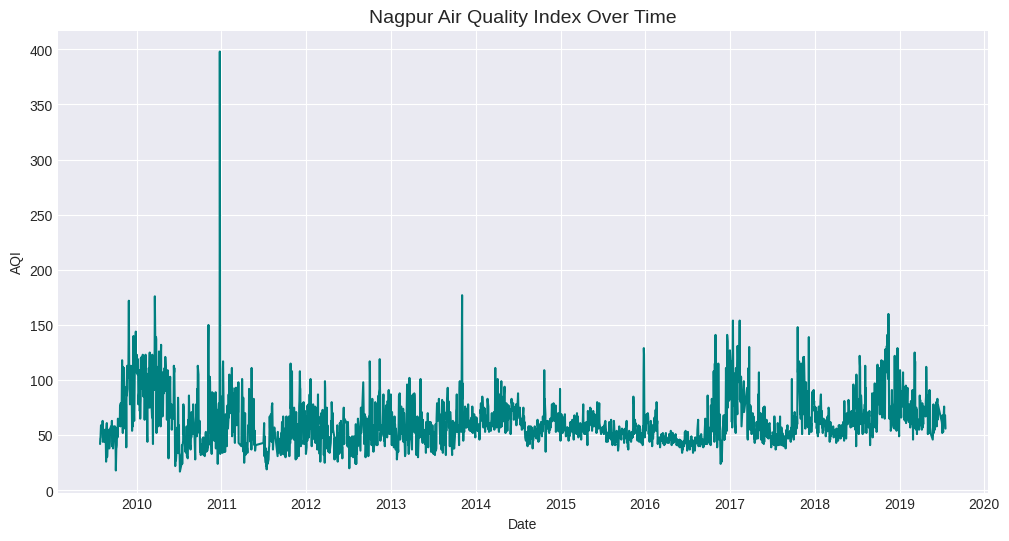

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='AQI', color='teal')
plt.title("Nagpur Air Quality Index Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

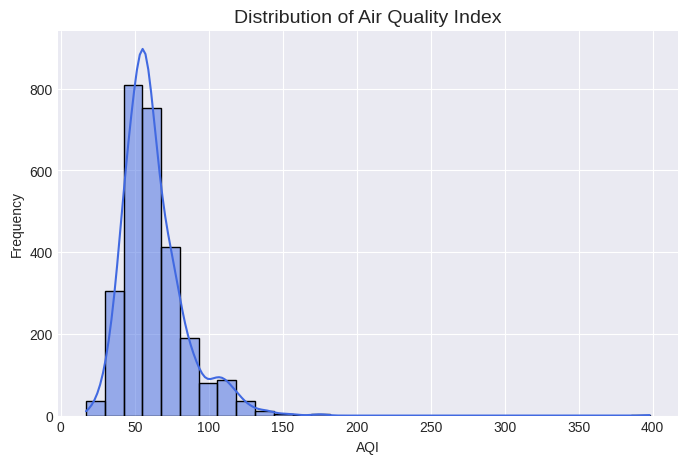

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['AQI'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Air Quality Index", fontsize=14)
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

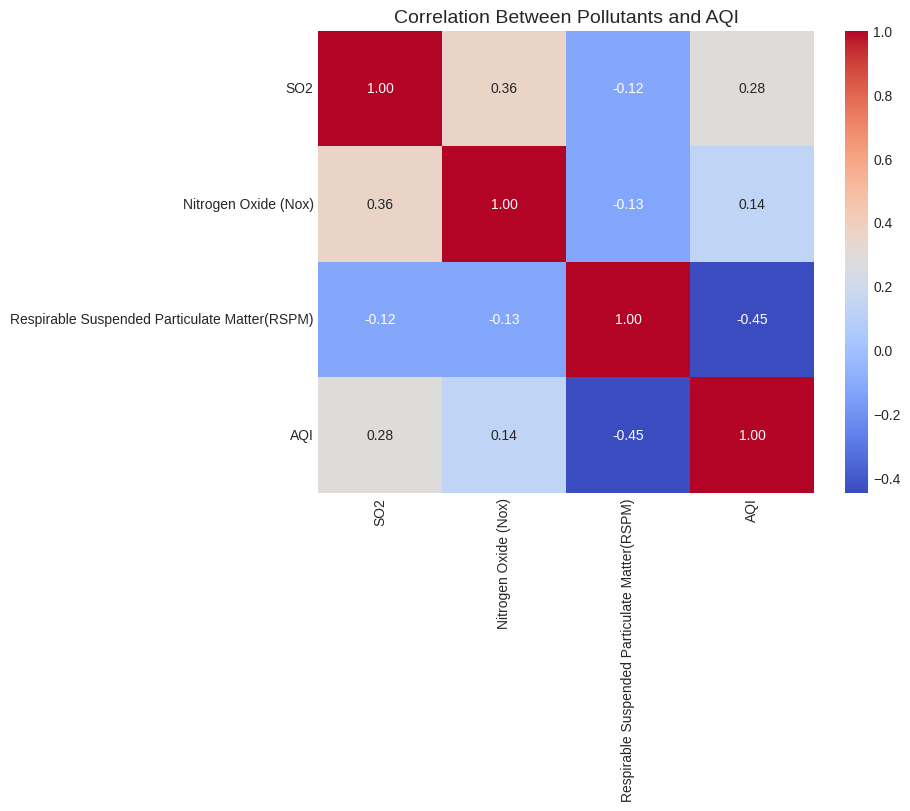

In [36]:
import numpy as np

df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('µg/m3', '').str.strip()

pollutant_cols = ['SO2', 'Nitrogen Oxide (Nox)', 'Respirable Suspended Particulate Matter(RSPM)', 'AQI']

pollutant_cols = [col for col in pollutant_cols if col in df.columns]

for col in pollutant_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df_corr = df[pollutant_cols].dropna()

plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Pollutants and AQI", fontsize=14)
plt.show()